# Question

During campus interviews, company XYZ typically evaluates students based on their test scores from the company's assessment, their % of mark, and interview performance. However, moving forward, the company has decided not to interview all students and instead needs to filter candidates before scheduling interviews.

The company possesses historical data that includes test scores, CGPA, and selection outcomes for previous candidates. This data will be utilized to predict whether a new candidate, with a specific test score and CGPA, will be selected for an interview or not.

Data Set: interviewData.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/interviewData.csv',header=None)
df.columns = ['Exam Mark','test score','Selection']
df.head()

,Exam Mark,test score,Selection
0,34.623660,78.024693,No
1,30.286711,43.894998,No
2,35.847409,72.902198,No
3,60.182599,86.308552,Yes
4,79.032736,75.344376,Yes


## Exploratory data analysis


**Answer the following:**
* What is your target variable?
> The 'Selection' column variables
* Do you need to encode the target variable (Yes/No)?
>Yes
* If yes, briefly explain why you need to encode the target variable.
> Because these are categorical variables and for analysis must be converted to numerical data, so encoding is needed
* Consider the encoding methods: One-hot encoding, Binary encoding, and Label Encoding. Which one do you apply in this case?
> Label encoding can be applied here to assign unique values to each category type
* Explain why you have selected the above encoding method.
> by using label encoding there won't be data redundancy

Read the following article

https://medium.com/@swayampatil7918/exploring-different-encoding-techniques-for-machine-learning-models-b762e3b546db

In [4]:
# Create a new dataset by apply the encoding  method selected above on the dataset

# Read this to implement this part
#  https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


# Transform the target variable
df['Selection'] = label_encoder.fit_transform(df['Selection'])
df.head()

display(df)

,Exam Mark,test score,Selection
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


<Axes: xlabel='Exam Mark', ylabel='test score'>

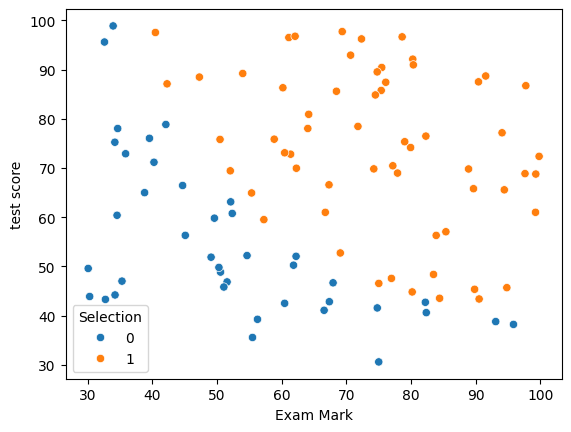

In [5]:
# Wrie a code to visualize your data
# See https://seaborn.pydata.org/generated/seaborn.scatterplot.html

import seaborn as sns

sns.scatterplot(data=df,x ='Exam Mark',y='test score',hue ='Selection')

## Logistic Regression Model

logistic regression model applies the sigmoid to the familiar linear regression model as shown below:

$$ \hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) $$

  where

  $$g(z) = \frac{1}{1+e^{-z}}$$

That is
$$\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \frac{1}{1+e^{-(\mathbf{w} \cdot \mathbf{x}^{(i)} + b )}}$$

In [11]:
# Write a function 'predict' to compute the logistic Regression model

import numpy as np

def sigmoid(z):

    return 1 / (1 + np.exp(-z))

def predict(w, b, x):

    z = np.dot(x, w) + b
    return sigmoid(z)

### Answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> no
* Explain why you said yes or no to the above questions.
> we usually use cost function for regression not for classification. Here cost function will become non convex and gradient descent may reach only local minima

### Log Loss/ Sigmoid Cross Entropy for Logistic regression

     


$$ loss(\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(\hat y_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - \hat y_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) $$

### Cost function


$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right]$$

### Answer the following


* What is a loss function?
> It's the error in prediction of a single value
* What is a cost function?
> It's the sum of all errors of all values
* What is the distinction between them?
> loss function is for one instance and cost function is for all instances

### Derivative of the cost function with respect to weights

Type here the formulas to compute the derivatives of the const function with respect to $w_1$, $w_2$ and b

In [13]:
# write a function to estimate the derivatives of the cost function

def compute_cost(w, b, x, y):

    m = len(y)
    new_predictions = predict(w, b, x)
    cost = -1/m * np.sum(y * np.log(new_predictions) + (1 - y) * np.log(1 - new_predictions))
    return cost


def compute_gradient_wb(w, b, x, y):

    m = len(y)
    new_predictions = predict(w, b, x)
    dz = new_predictions - y
    dw = 1/m * np.dot(x.T, dz)
    db = 1/m * np.sum(dz)
    return dw, db

### Gradient Descent Algorithm

$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j := 0..n-1} \\
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

In [23]:
# Write a function to perform the gradient decent

def gradient_descent(w,b,X_train,X_test,y_train,y_test,alpha,num_iter):
  training_costs = []
  testing_costs = []
  for i in range(num_iter):
        dw, db = compute_gradient_wb(w, b, X_train, y_train)
        w -= alpha * dw
        b -= alpha * db

        training_cost = compute_cost(w, b, X_train, y_train)
        testing_cost = compute_cost(w, b, X_test, y_test)
        training_costs.append(training_cost)
        testing_costs.append(testing_cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Training Cost = {training_cost}, Testing Cost = {testing_cost}")

  return w, b, training_costs, testing_costs

## Model Training

In [25]:
# Write the code to train the model

# Split the data into train and test datasets using
# see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# get the data from dataFrame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# split the dataset such that 20% test and 80% train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# initilize the weights
np.random.seed(1)
w_ini = np.random.rand(2)
b_ini = -9

# Fix the learning rate
alpha = 0.001

# fix the number of iteration
num_iter = 1000


w,b,training_costs,testing_costs = gradient_descent(w_ini,b_ini,X_train, X_test, y_train, y_test,alpha,num_iter)
print(f"Final parameters: w:{w}, b:{b}")

Iteration 0: Training Cost = nan, Testing Cost = nan
Iteration 100: Training Cost = 0.27434253660515234, Testing Cost = 0.3472287790440197
Iteration 200: Training Cost = 0.27418349111847296, Testing Cost = 0.35183883507712005
Iteration 300: Training Cost = 0.2741530354771521, Testing Cost = 0.35182732144615697
Iteration 400: Training Cost = 0.274122597007069, Testing Cost = 0.35181086356281105
Iteration 500: Training Cost = 0.2740921755516155, Testing Cost = 0.3517944132491621
Iteration 600: Training Cost = 0.27406177109608615, Testing Cost = 0.3517779757140786
Iteration 700: Training Cost = 0.27403138362579305, Testing Cost = 0.35176155095076145
Iteration 800: Training Cost = 0.27400101312606523, Testing Cost = 0.3517451389469256
Iteration 900: Training Cost = 0.2739706595822486, Testing Cost = 0.3517287396902949
Final parameters: w:[0.08239114 0.06566054], b:-9.026491511598241


<ipython-input-13-a18da8b4cd0d>:7: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(y * np.log(new_predictions) + (1 - y) * np.log(1 - new_predictions))
<ipython-input-13-a18da8b4cd0d>:7: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum(y * np.log(new_predictions) + (1 - y) * np.log(1 - new_predictions))


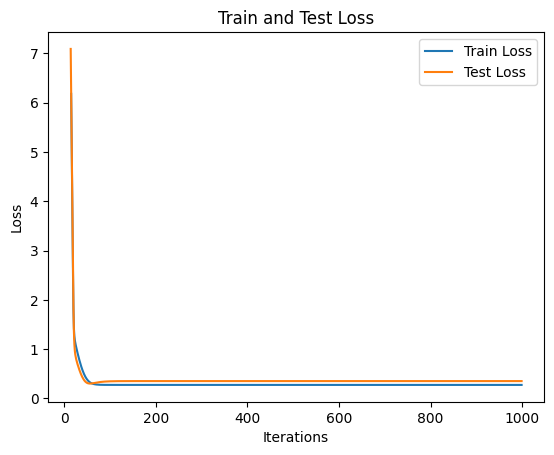

In [27]:
# Plot the train and test loss in one plot
import matplotlib.pyplot as plt
plt.plot(range(num_iter), training_costs, label='Train Loss')
plt.plot(range(num_iter), testing_costs, label='Test Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Train and Test Loss')
plt.legend()
plt.show()

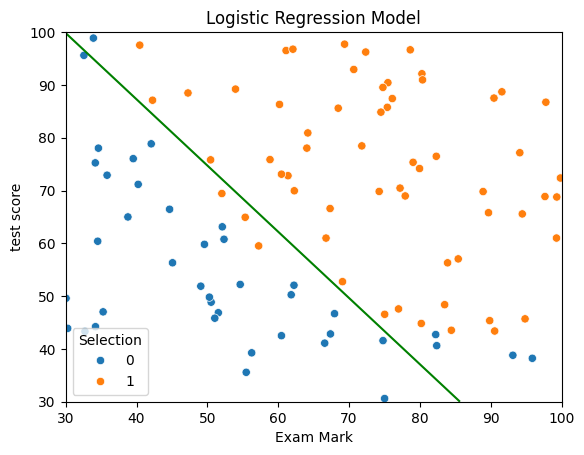

In [28]:
#  plot the Logistic Regression Model for the estimated w and b values
import matplotlib.pyplot as plt
import seaborn as sns
P = 0.5 # the boundary seperation value (probability)

# Generate sample points in the domain 30 to 100
u = np.linspace(30, 100, 50)
v = np.linspace(30, 100, 50)

# making it into 2D mesh
X, Y = np.meshgrid(u, v)
logReg = np.zeros((len(u), len(v)))

# Predict the result of the (u,v) pair data with the estimated w and b values
for i in range(len(u)):
    for j in range(len(v)):
      zz = X[i,j]*w[0]+Y[i,j]*w[1]+b
      logReg[i,j] = 1/(1+np.exp(-zz))


plt.contour(u,v,logReg, levels = [P], colors="g" )

# to see the full function plot in the domain
# plt.contourf(u,v,logReg)

# Plot the real data
sns.scatterplot(df,x = 'Exam Mark',y='test score',hue ='Selection')
plt.xlabel('Exam Mark')
plt.ylabel('test score')
plt.title('Logistic Regression Model')
plt.legend(title='Selection', loc='lower left')
plt.show()

### Answer the following


* What does the P value signify in the provided code?
> Here p value is the decision boundary i.e. a threshold value above which the chances of passing the interview is positive and below which it is negative
* How will altering the P value affect the outcome?
> if we increase the p value, the decision boundary will shift towards higher probability of passing and decreasing it will shift the boundary to lower possibility side
* What range of values can P encompass?
> All probability ranges have values varying between o and 1, so p value here can range from 0 to 1, however it is safer to assign a value of 0.5 looking at the scatterplot and evaluating its trend
* Describe the importance of the P value in a project aimed at classifying tumors as malignant or benign.
>we can definitely use logistic regression in this case as it is suitable for binary classifications just like the problem discussed above.

### Imagine a scenario where a student scores 65 marks in both the Exam and Test. Use your model to predict whether the student will pass the interview or not.

In [31]:
exam_score = 65
test_score = 65

total_score = np.array([[exam_score, test_score]])
pass_chance = predict(w, b, total_score)

label = 'Yes' if pass_chance >= 0.5 else 'No'

print(f"The chances of the student passing the interview is: {pass_chance[0]}")
print(f"The student will {'pass' if label == 'Yes' else 'not pass'} the interview.")

The chances of the student passing the interview is: 0.6449393168275962
The student will pass the interview.
